In [1]:
import random
import numpy as np
import time
import matplotlib.pyplot as plt

def playGame(i, N, p):
    money = i
    while (money != N and money != 0):
        toss = random.random()
        if toss > p:
            money -= 1
        else:
            money += 1
    if money == N:
        return 1
    else:
        return 0

In [2]:
# Markov Chain Monte Carlo Example, 1 Simulation

simulation = [playGame(10, 20, 0.5) for x in range(1000)]
print(str(sum(simulation)) + ': Wins')
print(str(1000 - sum(simulation)) + ': Losses')

503: Wins
497: Losses


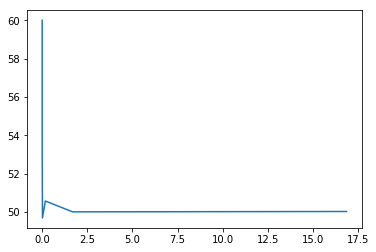

In [3]:
# Illustration of Time constraint of Simulation

times = []
winPerc = []
for count in range(1, 7):
    simCount = 10**count
    
    start = time.time()
    simulation = [playGame(10, 20, 0.5) for x in range(simCount)]
    end = time.time()
    
    times.append(end-start)
    winPerc.append(float(sum(simulation)) / simCount * 100)

plt.plot(times, winPerc)

In [4]:
# Simulation Count vs. Repeated Simulations (Monte Carlo)
start = time.time()
simulation = [playGame(10, 20, 0.5) for x in range(1000)]
end = time.time()
print(sum(simulation) / 1000 * 100)
print('Time: ' + str(end-start))
print('\n')

allSims = []
totalTime = 0
for i in range(5):
    start = time.time()
    sim = [playGame(10, 20, 0.5) for x in range(100)]
    end = time.time()
    
    totalTime += end-start
    allSims.append(sum(sim))
    
allSims = np.array(allSims)
print(np.mean(allSims))
print('Time: ' + str(totalTime))

49.7
Time: 0.019917964935302734


49.8
Time: 0.008163690567016602


Text(0,0.5,'Probability of Success')

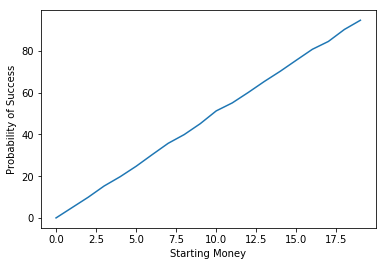

In [13]:
# p = 1/2
allSims = []
for x in range(20):
    sims = [playGame(x, 20, 0.5) for i in range(10000)]
    times.append(end-start)
    allSims.append(sum(sims) / 10000 * 100)

plt.plot(allSims)
plt.xlabel('Starting Money')
plt.ylabel('Probability of Success')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 1.2, 13.600000000000001, 38.0, 49.7]


Text(0,0.5,'Probability of reaching 20 dollars from 10 before ruin')

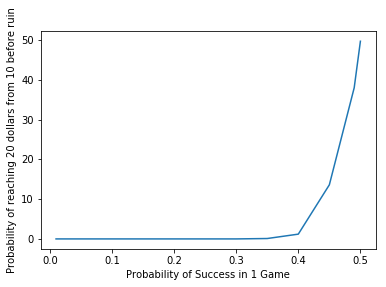

In [6]:
# varying p, probability of success from 0.01 up to 0.5

allSims = []
p_set = [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.49, 0.5]
for x in p_set:
    sims = [playGame(10, 20, x) for i in range(1000)]
    allSims.append(float(sum(sims) / 1000 * 100))

print(allSims)
plt.plot(p_set,allSims)
plt.xlabel('Probability of Success in 1 Game')
plt.ylabel('Probability of reaching 20 dollars from 10 before ruin')

[1.3, 2.5, 4.2, 5.6000000000000005, 8.3, 12.4, 18.0, 21.099999999999998, 29.599999999999998, 38.7, 48.0]


Text(0,0.5,'Probability of reaching 20 dollars from 10 before ruin')

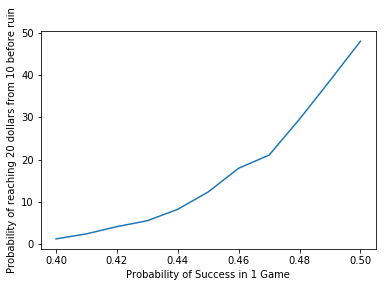

In [7]:
# varying p, probability of success from 0.4 up to 0.5

allSims = []
p_set = [0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5]
for x in p_set:
    sims = [playGame(10, 20, x) for i in range(1000)]
    allSims.append(float(sum(sims) / 1000 * 100))

print(allSims)
plt.plot(p_set,allSims)
plt.xlabel('Probability of Success in 1 Game')
plt.ylabel('Probability of reaching 20 dollars from 10 before ruin')

[40.27, 41.27, 42.089999999999996, 42.42, 43.97, 45.660000000000004, 46.93, 47.38, 48.67, 48.63, 50.36000000000001]


Text(0,0.5,'Probability of reaching 20 from 10')

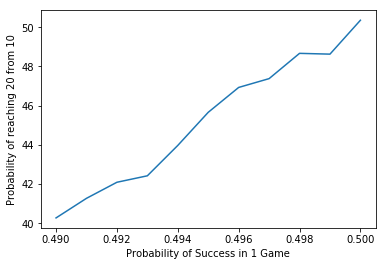

In [8]:
# varying p, probability of success from 0.49 up to 0.5

allSims = []
p_set = [0.49, 0.491, 0.492, 0.493, 0.494, 0.495, 0.496, 0.497, 0.498, 0.499, 0.5]
for x in p_set:
    sims = [playGame(10, 20, x) for i in range(10000)]
    allSims.append(float(sum(sims) / 10000 * 100))

print(allSims)
plt.plot(p_set,allSims)
plt.xlabel('Probability of Success in 1 Game')
plt.ylabel('Probability of reaching 20 from 10')

In [14]:
# Single Anecdote to be compared with Gambler's Ruin Equation
allSims = []
for x in range(5):
    sims = 10000
    MonteCarloPred = [playGame(10, 20, 0.51) for i in range(sims)]
    allSims.append(sum(MonteCarloPred) / sims * 100)
    
allSims = np.array(allSims)
print(np.mean(allSims))

59.78399999999999


In [10]:
# Pi = 1-r^i / 1-r^N
def Pi(p, i, N):
    r = float(1-p)/p
    return (1-r**i) / (1-r**N)

In [11]:
Pi(0.51, 10, 20)

0.5987004770276293

In [15]:
# Roulette Wheel Calculations

Pi(0.473, 18, 20)

0.7802798409695411